<a href="https://colab.research.google.com/github/Tim-Leschke/STA6257_Project_RandomForest_New/blob/main/Copy_of_trl34_ml_regression_scikit_bostonhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=2)

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# new below
print("raw df below")

print(raw_df)
data_top = raw_df.head()
data_top

print("columns")
print(raw_df.columns)

raw_df_test = pd.read_csv(data_url, sep="\s+", skiprows=22)

print("head")
print(raw_df_test.head())

print("print target below")
print(target)

print("print data below")

print(data)

print("1st test below")
print(raw_df.values[::2, 1])

print("2nd test below")

print(raw_df.values[1::2, :2])


raw df below
             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( data, target , test_size=0.20, random_state=42)

In [ ]:
for d in [X_train, X_test, y_train, y_test]:
  print(d.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In this session, we continue to look at the same data with multiple features. We will look at the Boston House price data:
https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset

preparation of the data: noramlize the training data

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [ ]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 34, number of weight updates: 13737.0


In [ ]:
# make a prediction using sgdr.predict()
y_pred = sgdr.predict(X_norm)
y_test_pred = sgdr.predict(X_test_norm)
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")
print(f"Prediction on test set:\n{y_test_pred[:4]}" )
print(f"Target values \n{y_test[:4]}")
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))

Prediction on training set:
[10.7  19.59 23.31 11.89]
Target values 
[12.  19.9 19.4 13.4]
Prediction on test set:
[31.34 38.18 17.52 26.59]
Target values 
[23.6 32.4 13.6 22.8]
Mean squared error: 21.71
Mean squared error: 27.80


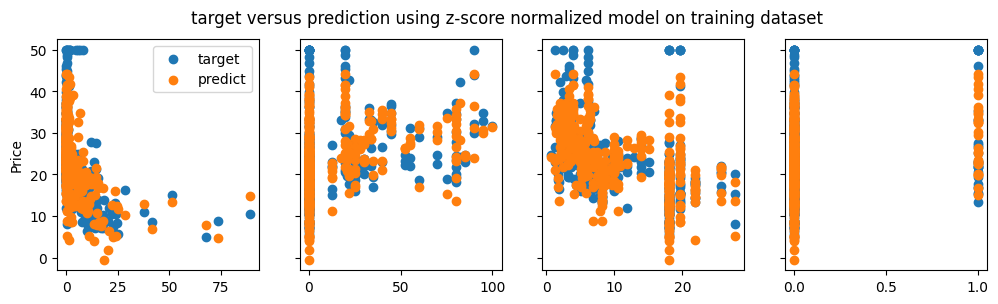

In [ ]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    # ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score "
  "normalized model on training dataset")
plt.show()

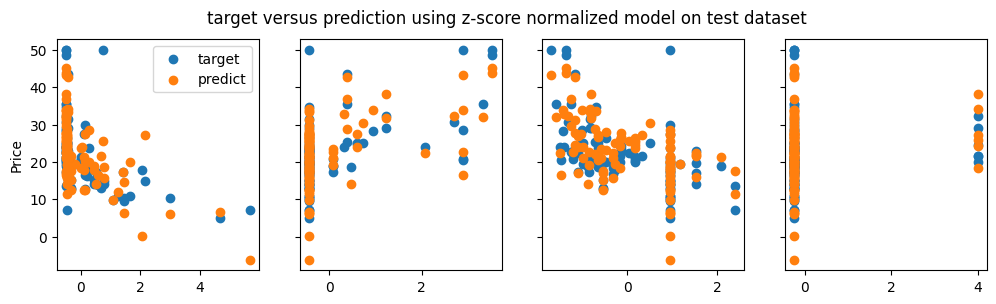

In [ ]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test_norm[:,i],y_test, label = 'target')
    # ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_test_norm[:,i],y_test_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model on test dataset")
plt.show()